# Air Pollution Data from the Chief Inspectorate of Environmental Protection

This notebook uses official data on air quality and pollution levels provided by the **Chief Inspectorate of Environmental Protection (Główny Inspektorat Ochrony Środowiska - GIOŚ)** in Poland.

You can explore more details and download datasets here:  
[Air Quality Data - GIOŚ](https://powietrze.gios.gov.pl/pjp/archives)

We make the neccesary imports and load an example data

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

df = pd.read_excel("./2020/2020_PM10_1g.xlsx", skiprows=5, decimal=",")

Let's see what we have got here

In [3]:
df

,Kod stanowiska,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKamGoraMOB-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,...,WpKozieosLes-PM10-1g,WpPilaKusoci-PM10-1g,WpPleszAlMic-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpPolczSolanMOB-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g
0,2020-01-01 01:00:00,13.26560,20.9803,28.6103,NaN,80.1424,73.4212,164.1390,55.8110,58.1482,...,32.8424,41.4021,36.8756,37.3714,28.9952,11.4370,NaN,NaN,27.1519,155.2170
1,2020-01-01 02:00:00,21.82650,16.2792,16.0381,NaN,99.7170,20.9602,50.4853,14.2842,18.0683,...,40.1560,59.8856,66.3461,20.2835,18.6745,50.2739,NaN,NaN,22.8034,34.0925
2,2020-01-01 03:00:00,19.28800,12.1531,12.1850,NaN,65.7759,20.7233,37.3239,13.5887,16.9889,...,22.5447,22.1748,29.9203,20.3019,20.7499,40.4866,NaN,30.0146,12.0413,23.8306
3,2020-01-01 04:00:00,16.10020,16.9374,12.2058,NaN,65.6279,20.8706,27.7411,15.0669,13.8445,...,19.1841,19.4625,31.3386,20.4632,20.8281,19.2404,NaN,24.4473,15.6158,22.9944
4,2020-01-01 05:00:00,11.78780,19.4819,11.9389,NaN,56.7138,15.4480,28.8750,17.6813,18.0348,...,19.9168,18.5257,24.3949,19.8122,19.0966,14.3692,NaN,28.2080,13.5071,22.6939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 20:00:00,13.43540,110.4890,138.4350,NaN,216.7820,70.6657,185.7720,403.4100,34.5031,...,75.9289,139.8840,110.2540,NaN,85.5207,29.0465,28.6692,116.6030,36.2080,18.3336
8780,2020-12-31 21:00:00,9.31784,95.2876,163.4270,NaN,256.6130,101.5840,211.2010,358.8640,36.0384,...,79.0472,175.6740,109.6810,NaN,101.3240,26.0424,33.0740,53.3246,37.6338,17.2375
8781,2020-12-31 22:00:00,14.00850,63.4842,154.0430,NaN,229.1590,101.2180,211.5560,330.5060,34.6089,...,87.3010,132.1180,90.0704,NaN,102.1370,31.3701,34.3002,27.9006,47.7411,19.3319
8782,2020-12-31 23:00:00,14.21990,97.6043,215.2370,NaN,226.8930,79.1241,160.6000,332.1330,28.6939,...,92.6771,139.6520,78.7774,NaN,108.8390,34.2911,37.7539,28.0046,50.1252,22.4708


Like in the name of the data file we see that we have PM10 data for various stations with one hour time resolution

Now let's add a new column to the DataFrame that contains the year extracted from the 'Data' column.

In [4]:
data = pd.to_datetime(df["Kod stanowiska"])
df["Data"] = data
df


,Kod stanowiska,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKamGoraMOB-PM10-1g,DsKlodzSzkol-PM10-1g,DsLegAlRzecz-PM10-1g,DsLubanMieszMOB-PM10-1g,DsNowRudJezi-PM10-1g,DsOlawZolnAK-PM10-1g,...,WpPilaKusoci-PM10-1g,WpPleszAlMic-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznRatajeMOB-PM10-1g,ZpKoszArKraj-PM10-1g,ZpPolczSolanMOB-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczPils02-PM10-1g,Data
0,2020-01-01 01:00:00,13.26560,20.9803,28.6103,NaN,80.1424,73.4212,164.1390,55.8110,58.1482,...,41.4021,36.8756,37.3714,28.9952,11.4370,NaN,NaN,27.1519,155.2170,2020-01-01 01:00:00
1,2020-01-01 02:00:00,21.82650,16.2792,16.0381,NaN,99.7170,20.9602,50.4853,14.2842,18.0683,...,59.8856,66.3461,20.2835,18.6745,50.2739,NaN,NaN,22.8034,34.0925,2020-01-01 02:00:00
2,2020-01-01 03:00:00,19.28800,12.1531,12.1850,NaN,65.7759,20.7233,37.3239,13.5887,16.9889,...,22.1748,29.9203,20.3019,20.7499,40.4866,NaN,30.0146,12.0413,23.8306,2020-01-01 03:00:00
3,2020-01-01 04:00:00,16.10020,16.9374,12.2058,NaN,65.6279,20.8706,27.7411,15.0669,13.8445,...,19.4625,31.3386,20.4632,20.8281,19.2404,NaN,24.4473,15.6158,22.9944,2020-01-01 04:00:00
4,2020-01-01 05:00:00,11.78780,19.4819,11.9389,NaN,56.7138,15.4480,28.8750,17.6813,18.0348,...,18.5257,24.3949,19.8122,19.0966,14.3692,NaN,28.2080,13.5071,22.6939,2020-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 20:00:00,13.43540,110.4890,138.4350,NaN,216.7820,70.6657,185.7720,403.4100,34.5031,...,139.8840,110.2540,NaN,85.5207,29.0465,28.6692,116.6030,36.2080,18.3336,2020-12-31 20:00:00
8780,2020-12-31 21:00:00,9.31784,95.2876,163.4270,NaN,256.6130,101.5840,211.2010,358.8640,36.0384,...,175.6740,109.6810,NaN,101.3240,26.0424,33.0740,53.3246,37.6338,17.2375,2020-12-31 21:00:00
8781,2020-12-31 22:00:00,14.00850,63.4842,154.0430,NaN,229.1590,101.2180,211.5560,330.5060,34.6089,...,132.1180,90.0704,NaN,102.1370,31.3701,34.3002,27.9006,47.7411,19.3319,2020-12-31 22:00:00
8782,2020-12-31 23:00:00,14.21990,97.6043,215.2370,NaN,226.8930,79.1241,160.6000,332.1330,28.6939,...,139.6520,78.7774,NaN,108.8390,34.2911,37.7539,28.0046,50.1252,22.4708,2020-12-31 23:00:00


And we set Data column as the index

In [5]:
df.drop("Kod stanowiska", axis = 1, inplace = True)
df.set_index("Data", inplace = True, drop = False)
df.drop("Data", axis = 1, inplace = True)

Let's plot some data

<Axes: xlabel='Data'>

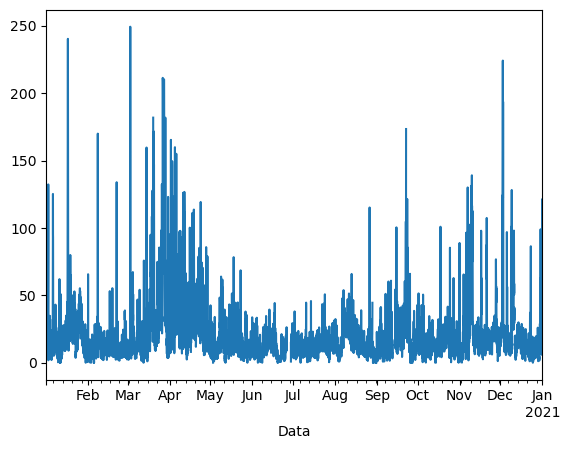

In [6]:
df['DsWalbrzWyso-PM10-1g'].plot()

Because the one hour data are huge, and we want to analyze the whole time period, let's focus on 1-day data

In [7]:
#df = pd.read_excel(sciezka, header=header, skiprows=skiprows, decimal=",")
df = pd.read_excel("./2020/2020_PM10_24g.xlsx", header = 1, skiprows=0, decimal=",")
df = df.drop(index=[0, 1, 2, 3], errors="ignore")  # drop first 4 rows if they exist (they contain metadata)
df

,Kod stacji,DsGlogWiStwo,DsJelGorSoko,DsKamGoraMOB,DsLegAlRzecz,DsNowRudJezi,DsOlawZolnAK,DsOlesBrzozo,DsOsieczow21,DsPolKasztan,...,WpWagrowLipo,ZpKolZolkiew,ZpKoszArKraj,ZpKoszSpasow,ZpMyslZaBram,ZpPolczSolanMOB,ZpSzczAndr01,ZpSzczec1Maj,ZpSzczecPrze,ZpSzczPils02
4,2020-01-01 00:00:00,26.99,30.98,NaN,45.4,113.52,34.62,33.97,26.13,23.04,...,23.17,26.56,23.22,24.93,26.18,NaN,31.75,21.77,19.77,49.89
5,2020-01-02 00:00:00,63.22,94.75,NaN,112.03,265.39,77.24,77.03,38.26,44.2,...,61.51,30.26,31.76,28.74,33.09,NaN,21.41,21.96,26.67,36.1
6,2020-01-03 00:00:00,20.03,39.98,NaN,42.44,77.31,59.62,54.81,22.49,19.44,...,24.21,16.19,15.97,14.92,14.18,NaN,11.61,13.61,15.24,18.14
7,2020-01-04 00:00:00,12.03,10.5,NaN,14.69,12,10.56,11.98,11.83,10.34,...,14.29,15.64,12.88,12.01,11.27,NaN,12.16,11.61,19.59,14.7
8,2020-01-05 00:00:00,18.48,26.38,NaN,26.86,82.9,20.58,26.26,19.31,18.23,...,25.49,15.83,13.61,12.74,20,NaN,15.24,11.97,16.33,21.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2020-12-27 00:00:00,15.06,8.35,9.92,17.58,19.59,10.21,12.55,6.74,11.71,...,18.09,9.82,11.97,11.46,12.91,8.73,8.83,15.78,14.88,11.25
366,2020-12-28 00:00:00,15.24,8.82,15.01,15.71,31.26,11.08,10.55,10.43,16.27,...,22.09,14.73,16.87,16,20.91,13.46,14.6,20.14,21.95,18.51
367,2020-12-29 00:00:00,13.15,8.62,14.28,16.39,16.03,12.43,12.52,9.62,12.03,...,22.65,20.55,19.6,19.1,22.37,13.64,18.74,17.05,21.59,28.48
368,2020-12-30 00:00:00,33.36,28.77,NaN,84.55,139.07,62.64,44.69,13.32,34.2,...,77.66,13.46,19.59,15.82,22.55,9.27,10.76,15.42,27.21,20.68


Now let's load all of the files from the folders for PM10

# Data Files Structure

The dataset is organized into yearly folders (2000–2023).  
Each folder contains Excel files with air pollution data, e.g. daily concentrations of PM10.

📂 2000  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2000_PM10_24g.xlsx  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2000_PM2.5_24g.xlsx  

📂 2001  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2001_PM10_24g.xlsx  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2001_PM2.5_24g.xlsx  

...  

📂 2022  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2022_PM10_24g.xlsx  

📂 2023  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2023_PM10_24g.xlsx  
&nbsp;&nbsp;&nbsp;&nbsp;📄 2023_PM2.5_24g.xlsx  

In [9]:

import pandas as pd
import glob
import os
import re

#root_folder = "./"
#plik_lista = glob.glob(os.path.join(root_folder, "*", "*PM25_24g.xlsx"))
df_list = []
name = "PM10_24g"
root_folder = "./"
# files are organized by year, so we look for folders with 4-digit names
pattern = os.path.join(root_folder, "[0-9][0-9][0-9][0-9]", f"[0-9][0-9][0-9][0-9]_{name}.xlsx")
files = glob.glob(pattern)

for path in files:
    try:
        print(f"Wczytywanie: {path}")

        # We look for the year in the file path
        fit = re.search(r'(\d{4})', path)
        if fit:
            rok = int(fit.group(1))
        else:
            print(f"Nie można rozpoznać roku z: {path}")
            continue

        # Different handling of headers based on the year (files have different structures)
        if rok <= 2015:
            skiprows = 0
        else:
            skiprows = 1

        # Loading the data
        df = pd.read_excel(path, skiprows=skiprows, header=0, decimal=",")

        # files have different structures for different years, so we need to drop specific rows
        if rok <= 2015:
            df = df.drop(index=[0,1], errors="ignore")
        else:
            df = df.drop(index=[0,1,2,3], errors="ignore")

        # Let's add a column with the date
        df.rename(columns={df.columns[0]: "Data"}, inplace=True)
        df["Data"] = pd.to_datetime(df["Data"], errors='coerce')
        df.set_index("Data", inplace=True)

        df_list.append(df)

    except Exception as e:
        print(f"Błąd w pliku {sciezka}: {e}")

# Merge all dataframes into one
df_all = pd.concat(df_list, axis=0).sort_index()





Wczytywanie: .\2000\2000_PM10_24g.xlsx
Wczytywanie: .\2001\2001_PM10_24g.xlsx
Wczytywanie: .\2002\2002_PM10_24g.xlsx
Wczytywanie: .\2003\2003_PM10_24g.xlsx
Wczytywanie: .\2004\2004_PM10_24g.xlsx
Wczytywanie: .\2005\2005_PM10_24g.xlsx
Wczytywanie: .\2006\2006_PM10_24g.xlsx
Wczytywanie: .\2007\2007_PM10_24g.xlsx
Wczytywanie: .\2008\2008_PM10_24g.xlsx
Wczytywanie: .\2009\2009_PM10_24g.xlsx
Wczytywanie: .\2010\2010_PM10_24g.xlsx
Wczytywanie: .\2011\2011_PM10_24g.xlsx
Wczytywanie: .\2012\2012_PM10_24g.xlsx
Wczytywanie: .\2013\2013_PM10_24g.xlsx
Wczytywanie: .\2014\2014_PM10_24g.xlsx
Wczytywanie: .\2015\2015_PM10_24g.xlsx
Wczytywanie: .\2016\2016_PM10_24g.xlsx
Wczytywanie: .\2017\2017_PM10_24g.xlsx
Wczytywanie: .\2018\2018_PM10_24g.xlsx
Wczytywanie: .\2019\2019_PM10_24g.xlsx
Wczytywanie: .\2020\2020_PM10_24g.xlsx
Wczytywanie: .\2021\2021_PM10_24g.xlsx
Wczytywanie: .\2022\2022_PM10_24g.xlsx
Wczytywanie: .\2023\2023_PM10_24g.xlsx


Now we need to clean the data, because sometimes may contain non numeric characters

In [10]:
df_all

# 1. Some columns may contain non-numeric characters, so we need to clean them
def clean_column(series):
    s = series.astype(str).str.strip()
    s = s.str.replace(',', '.', regex=False)
    s = s.replace(r'[^0-9\.\-]', '', regex=True)
    return pd.to_numeric(s, errors='coerce')

# 2. Apply to all data
df_all = df_all.apply(clean_column)
df_all


,DsWrocWie,KpCiechoTezniowa,LdLodzWSSEMWodna40,MpKrakowWIOSAKra6117,MpKrakowWIOSPrad6115,MzWarszKrucza,PkPrzemWIOSDolin,DsJelw05,KpWloclSielska,LbBialaPOrzechowa,...,MzKonJezZero,MzPultuskMicMOB,OpKrap3Maja,PdBialPPiech,PkJedliTokarMOB,PmUstkaRybacMOB,SkLagowZaploMOB,SkWloszKilinMOB,WmKetrWojPolMOB,ZpSwinMatejkMOB
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,135.9,130.0,NaN,153.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,129.1,116.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,37.9,25.0,55.0,41.2,33.0,35.6,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,21.6,NaN,44.0,36.4,26.0,37.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,44.4,12.0,42.0,33.9,24.0,26.4,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,14.1,30.7,3.6,NaN,NaN,16.3,21.9,11.25,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,NaN,30.9,15.4,NaN,NaN,32.5,NaN,24.89,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.6,13.8,23.8,8.3,NaN,NaN,17.5,NaN,NaN,NaN


We have some NaN's here, but it's ok - different stations had different operating times

Now we have float64, and let's show an example plot: here we see that for this station data are from 2015

Data
2000-01-01     NaN
2000-01-02     NaN
2000-01-03     NaN
2000-01-04     NaN
2000-01-05     NaN
              ... 
2023-12-27     7.8
2023-12-28    12.4
2023-12-29    12.5
2023-12-30    12.6
2023-12-31    14.5
Name: DsWalbrzWyso, Length: 8766, dtype: float64


<Axes: xlabel='Data'>

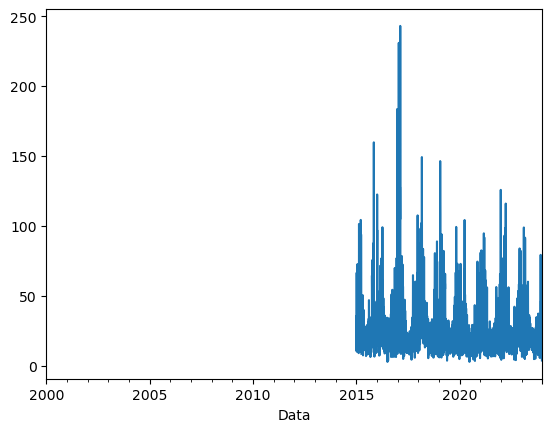

In [ ]:
print(df_all['DsWalbrzWyso'])
df_all['DsWalbrzWyso'].plot()

Let's add metadata file

In [ ]:
df_meta = pd.read_excel("./meta.xlsx", decimal=",")
df_meta.set_index("Nr", inplace = True, drop = True)
#here some columns may contain spaces or special characters, so we need to clean them (only for convenience)
df_meta.columns = df_meta.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)
df_meta = df_meta.rename(columns={'stary_kod_stacji_(o_ile_inny_od_aktualnego)': 'stary_kod'})
df_meta = df_meta.rename(columns={
    'wgs84_φ_n': 'lat',
    'wgs84_λ_e': 'lon'
})
ds = df_meta.to_xarray()
#save to netcdf for later use
ds.to_netcdf("metadata.nc")
df_meta

,kod_stacji,kod_międzynarodowy,nazwa_stacji,stary_kod,data_uruchomienia,data_zamknięcia,typ_stacji,typ_obszaru,rodzaj_stacji,województwo,miejscowość,adres,lat,lon
Nr,,,,,,,,,,,,,,
1,DsBialka,NaN,Białka,NaN,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
2,DsBielGrot,NaN,Bielawa - ul. Grota Roweckiego,NaN,1994-01-02,2003-12-31,tło,miejski,w budynku,DOLNOŚLĄSKIE,Bielawa,ul. Grota Roweckiego 6,50.682510,16.617348
3,DsBogatFrancMOB,PL0602A,Bogatynia Mobil,DsBogatMob,2015-01-01,2015-12-31,tło,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,ul. Francuska/Kręta,50.940998,14.916790
4,DsBogChop,PL0315A,Bogatynia - Chopina,NaN,1996-01-01,2013-12-31,przemysłowa,miejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Bogatynia,ul. Chopina 35,50.905856,14.967175
5,DsBogZatonieMob,PL0576A,Bogatynia - Mobil,NaN,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,ZpSzczPilsud,PL0249A,"Szczecin, ul. Piłsudskiego","ZpSzczecin002, ZpSzczPils02",2004-12-31,NaT,komunikacyjna,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Piłsudskiego 1,53.432169,14.553900
1113,ZpSzczWSSEEnerg,NaN,Energetyków,NaN,1992-01-01,2003-12-31,komunikacyjna,miejski,w budynku,ZACHODNIOPOMORSKIE,Szczecin,ul. Energetyków 2,53.420475,14.561934
1114,ZpSzczWSSESped6,NaN,Spedytorska,NaN,1992-01-01,2004-01-01,tło,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Spedytorska 6,53.415043,14.555347


here we have important thing: the stations have old-names and new-names (stary-kod and kod_stacji).

we need to "merge" the stations so that one station will have only one name and one time - series

In [13]:
# we perform some alias mapping to unify station names
alias_map = {}

for _, row in df_meta.iterrows():
    kod = row['kod_stacji']
    
    # add the main station code as an alias of itself
    if pd.notna(kod):
        alias_map[kod] = kod
    
    # if the station has an old code, we add it as an alias
    if pd.notna(row['stary_kod']):
        for alias in str(row['stary_kod']).split(','):
            alias = alias.strip()
            if alias:
                alias_map[alias] = kod

alias_map


{'DsBialka': 'DsBialka',
 'DsBielGrot': 'DsBielGrot',
 'DsBogatFrancMOB': 'DsBogatFrancMOB',
 'DsBogatMob': 'DsBogatFrancMOB',
 'DsBogChop': 'DsBogChop',
 'DsBogZatonieMob': 'DsBogZatonieMob',
 'DsBoleslaMOB': 'DsBoleslaMOB',
 'DsBrzegGlog': 'DsBrzegGlog',
 'DsChojnowKil': 'DsChojnowKil',
 'DsCzar07': 'DsCzar07',
 'DsCzerStraza': 'DsCzerStraza',
 'DsCzer02': 'DsCzerStraza',
 'DsCzLasMob': 'DsCzLasMob',
 'DsDusznikMOB': 'DsDusznikMOB',
 'DsDuszZiel': 'DsDuszZiel',
 'DsDzialoszyn': 'DsDzialoszyn',
 'DsDzia01': 'DsDzialoszyn',
 'DsDziePilsud': 'DsDziePilsud',
 'DsDzierPilsA': 'DsDziePilsud',
 'DsDzierKras': 'DsDzierKras',
 'DsGlogMob': 'DsGlogMob',
 'DsGlogNorw': 'DsGlogNorw',
 'DsGlogNorwArch': 'DsGlogNorwArch',
 'DsGlogOrzech': 'DsGlogOrzech',
 'DsGlogowko': 'DsGlogowko',
 'DsGlogSikor': 'DsGlogSikor',
 'DsGlogWiStwo': 'DsGlogWiStwo',
 'DsGlogWita': 'DsGlogWiStwo',
 'DsGrodziec': 'DsGrodziec',
 'DsJasnaSport': 'DsJasnaSport',
 'DsJawDmow': 'DsJawDmow',
 'DsJaworMOB': 'DsJaworMOB',
 'DsJ

Now we use tha alias-mapping

In [14]:
df_renamed = df_all.copy()

# New columns are assigned according to alias_map
new_columns = {
    col: alias_map.get(col, col) for col in df_renamed.columns
}

df_renamed = df_renamed.rename(columns=new_columns)
df_renamed


,DsWrocWie,KpCiechTezni,LdLodzWSSEMWodna40,MpKrakAlKras,MpKrakowWIOSPrad6115,MzWarszKrucza,PkPrzemWIOSDolin,DsJelw05,KpWloclSiels,LbBiaPodOrze,...,MzKonJezZero,MzPultuskMicMOB,OpKrap3Maja,PdBialPPiech,PkJedliTokarMOB,PmUstkaRybacMOB,SkLagowZaploMOB,SkWloszKilinMOB,WmKetrWojPolMOB,ZpSwinMatejkMOB
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,135.9,130.0,NaN,153.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,129.1,116.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,37.9,25.0,55.0,41.2,33.0,35.6,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,21.6,NaN,44.0,36.4,26.0,37.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,44.4,12.0,42.0,33.9,24.0,26.4,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,14.1,30.7,3.6,NaN,NaN,16.3,21.9,11.25,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,NaN,30.9,15.4,NaN,NaN,32.5,NaN,24.89,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.6,13.8,23.8,8.3,NaN,NaN,17.5,NaN,NaN,NaN


We add mapping from station code to location-address for convenience

In [15]:
# Aggregation: e.g., mean, but you can also use .first(), .max(), etc.
df_merged = df_renamed.groupby(axis=1, level=0).mean(numeric_only=True)

# create a mapping from station code to "location-address"
location_map = {
    row['kod_stacji']: f"{row['nazwa_stacji']}"
    for _, row in df_meta.iterrows()
    if pd.notna(row['kod_stacji']) and pd.notna(row['nazwa_stacji'])
}

# Change column names in df_merged
df_merged.columns = [location_map.get(col, col) for col in df_merged.columns]
df_merged


C:\Users\szymo\AppData\Local\Temp\ipykernel_13664\3888839490.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_merged = df_renamed.groupby(axis=1, level=0).mean(numeric_only=True)


,Białka,Bogatynia - Mobil,Czarny Las - Mobil Mercedes,Czerniawa,Działoszyn,Głogów - Norwida,Głogów - Norwida Arch,"Głogów, ul. Wita Stwosza",Jawor,"Jedlina-Zdrój, ul. Piastowska",...,Szczecinek_PSSE,"Szczecin, ul. Andrzejewskiego",Szczecin_Budzysza Wosia,Szczecin_Łączna,"Szczecin, ul. Piłsudskiego",Spedytorska,"Szczecinek, ul. 1 Maja","Szczecinek, ul. Przemysłowa",Szczecin_WojskaPolskiego,Widuchowa
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.7,NaN,NaN,...,NaN,12.5,NaN,NaN,29.9,NaN,19.8,17.2,NaN,NaN
2023-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,NaN,...,NaN,5.6,NaN,NaN,19.4,NaN,17.1,13.1,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,...,NaN,2.9,NaN,NaN,16.3,NaN,11.2,8.5,NaN,NaN


Now we add mean for each station: we want to show these on the map

In [16]:
# Pomijamy kolumnę 'data'
df_avg = df_merged.mean().reset_index()
df_avg.columns = ['nazwa_stacji', 'srednia']
df_avg

,nazwa_stacji,srednia
0,Białka,32.197347
1,Bogatynia - Mobil,81.655172
2,Czarny Las - Mobil Mercedes,23.555633
3,Czerniawa,16.366032
4,Działoszyn,26.340056
...,...,...
472,Spedytorska,26.714286
473,"Szczecinek, ul. 1 Maja",24.082572
474,"Szczecinek, ul. Przemysłowa",22.399280
475,Szczecin_WojskaPolskiego,24.542663


We can add the metadata to the means.

We clean the stations without the coordinates.

In [17]:
df_merged = df_avg.merge(df_meta, on='nazwa_stacji', how='left')
missing_coords = df_merged[df_merged[['lat', 'lon']].isna().any(axis=1)]
print("⚠️ Stacje bez współrzędnych:")
print(missing_coords[['nazwa_stacji']])
df_merged = df_merged.dropna(subset=['lat', 'lon'])
df_merged



⚠️ Stacje bez współrzędnych:
         nazwa_stacji
32     DsOlesnicaPM.1
56  KpBrodnicaZwirkiW


,nazwa_stacji,srednia,kod_stacji,kod_międzynarodowy,stary_kod,data_uruchomienia,data_zamknięcia,typ_stacji,typ_obszaru,rodzaj_stacji,województwo,miejscowość,adres,lat,lon
0,Białka,32.197347,DsBialka,NaN,NaN,1990-01-03,2005-12-31,przemysłowa,podmiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Białka,NaN,51.197783,16.117390
1,Bogatynia - Mobil,81.655172,DsBogZatonieMob,PL0576A,NaN,2012-01-01,2012-12-31,przemysłowa,miejski,mobilna,DOLNOŚLĄSKIE,Bogatynia,"ul. Konrada, Zatonie",50.943245,14.913327
2,Czarny Las - Mobil Mercedes,23.555633,DsCzLasMob,PL0599A,NaN,2013-01-01,2013-12-31,tło,pozamiejski,mobilna,DOLNOŚLĄSKIE,Czarny Las,NaN,51.541658,16.937064
3,Czerniawa,16.366032,DsCzerStraza,PL0028A,DsCzer02,1996-07-01,NaT,tło,pozamiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Czerniawa,ul. Strażacka 7,50.912475,15.312190
4,Działoszyn,26.340056,DsDzialoszyn,PL0054A,DsDzia01,1996-07-01,2022-12-31,przemysłowa,pozamiejski,kontenerowa stacjonarna,DOLNOŚLĄSKIE,Działoszyn,NaN,50.972167,14.941319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Spedytorska,26.714286,ZpSzczWSSESped6,NaN,NaN,1992-01-01,2004-01-01,tło,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Spedytorska 6,53.415043,14.555347
474,"Szczecinek, ul. 1 Maja",24.082572,ZpSzczec1Maj,PL0535A,ZpSzcSzczecinek008,2009-12-11,NaT,tło,miejski,wolnostojący pobornik pyłu,ZACHODNIOPOMORSKIE,Szczecinek,ul. 1 Maja 22,53.712114,16.692517
475,"Szczecinek, ul. Przemysłowa",22.399280,ZpSzczecPrze,PL0574A,ZpSzcSzczecinek010,2011-01-01,NaT,przemysłowa,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecinek,ul. Przemysłowa 5,53.698902,16.704556
476,Szczecin_WojskaPolskiego,24.542663,ZpSzczecinWSSE,PL0183A,NaN,1992-01-01,2010-01-01,tło,miejski,kontenerowa stacjonarna,ZACHODNIOPOMORSKIE,Szczecin,ul. Wincentego Pola 6,53.450780,14.514745


Let's create a very nice visualization using folium and branca

In [ ]:
import folium
import pandas as pd
import branca.colormap as cm

# Skala kolorów wg wartości
def get_color(value, vmin, vmax):
    colormap = cm.linear.YlOrRd_09.scale(vmin, vmax)
    return colormap(value), colormap

# Zakres kolorów
vmin = df_merged['srednia'].min()
vmax = df_merged['srednia'].max()

# Mapa
m = folium.Map(location=[52.0, 19.0], zoom_start=6)

# Dodawanie punktów ze szczegółowym popupem
for _, row in df_merged.iterrows():
    color, colormap = get_color(row['srednia'], vmin, vmax)

    popup_text = f"""
    <b>Kod stacji:</b> {row['kod_stacji']}<br>
    <b>kod międzynarodowy:</b> {row['kod_międzynarodowy']}<br>
    <b>Nazwa stacji:</b> {row['nazwa_stacji']}<br>
    <b>Stary kod:</b> {row['stary_kod']}<br>
    <b>Data uruchomienia:</b> {row['data_uruchomienia']}<br>
    <b>Data zamknięcia:</b> {row['data_zamknięcia']}<br>
    <b>Typ stacji:</b> {row['typ_stacji']}<br>
    <b>Typ obszaru:</b> {row['typ_obszaru']}<br>
    <b>Rodzaj stacji:</b> {row['rodzaj_stacji']}<br>
    <b>Województwo:</b> {row['województwo']}<br>
    <b>Miejscowość:</b> {row['miejscowość']}<br>
    <b>Adres:</b> {row['adres']}<br>
    <b>Średnia:</b> {row['srednia']:.2f}
    """

    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        fill=True,
        fill_opacity=0.8,
        color=color,
        tooltip=f"{row['nazwa_stacji']} ({row['kod_stacji']})<br>Średnia: {row['srednia']:.2f}",
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

# Dodanie legendy kolorów
colormap.caption = 'Średnie zanieczyszczenie'
colormap.add_to(m)

# Zapis mapy
m.save('mapa_stacje.html')
m

